In [1]:
# Import necessary libraries for experimental designs
import numpy as np
import pandas as pd
from pyDOE2 import bbdesign, ccdesign
from sklearn.datasets import load_linnerud
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Simulate design plots

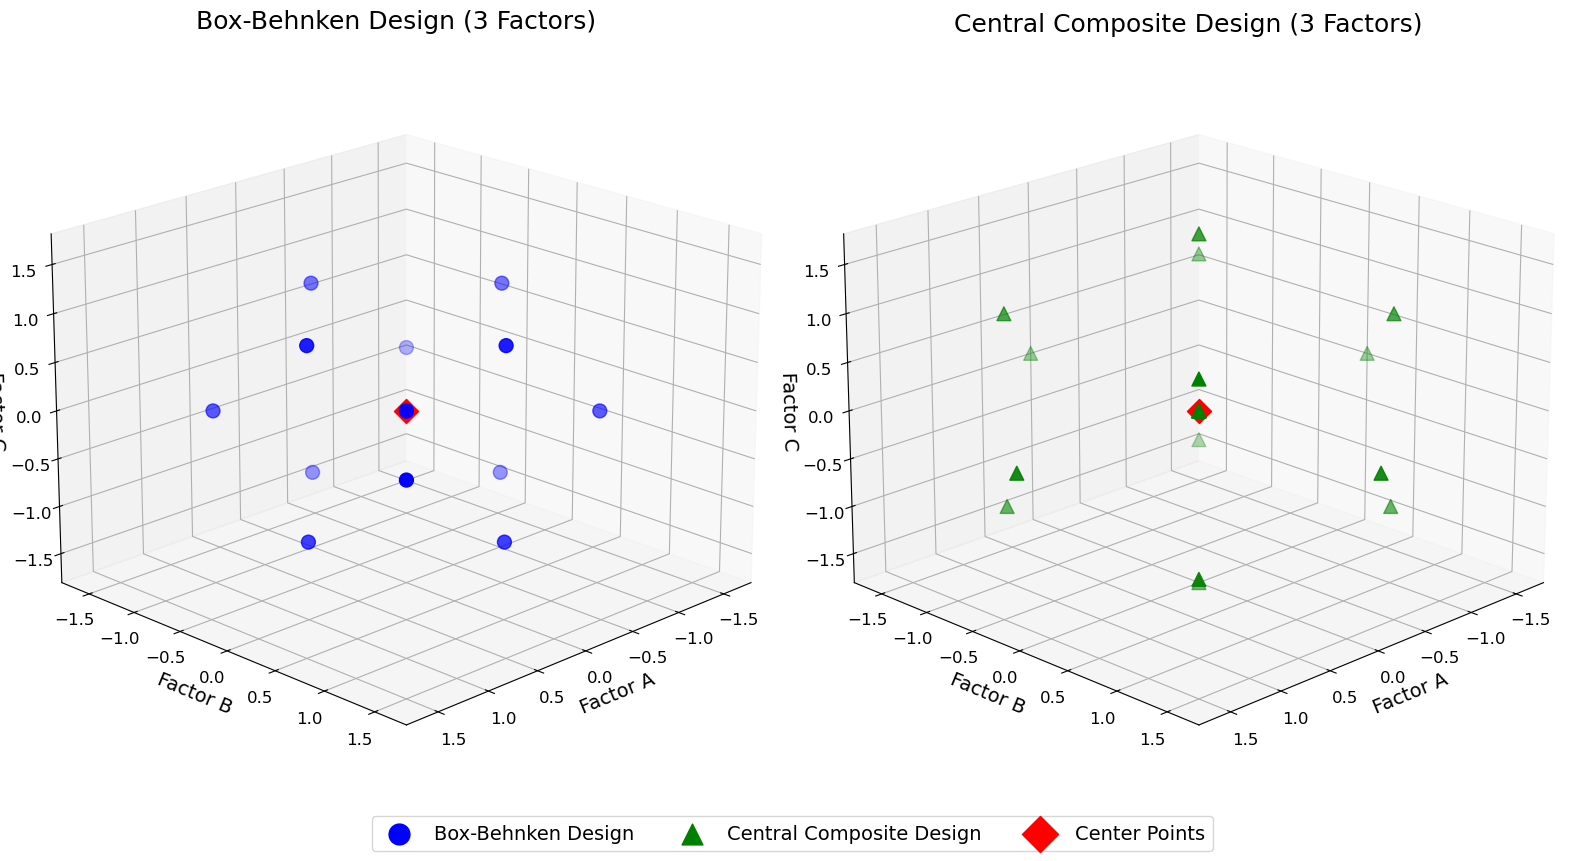

In [5]:
# Number of factors
factors = 3

# Generate Box-Behnken Design points
bbd = bbdesign(factors)

# Generate Central Composite Design points
ccd = ccdesign(factors, center=(3, 3))  # 3 center points

# Combine both designs to get consistent axis ranges
all_points = np.vstack([bbd, ccd])
min_val, max_val = np.min(all_points), np.max(all_points)

# 3D Visualization for BBD and CCD in side-by-side subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8), subplot_kw={'projection': '3d'})

# Font sizes
title_font_size = 18
label_font_size = 14
tick_font_size = 12
legend_font_size = 14
marker_size = 100  # Adjust marker size as needed

# Plot Box-Behnken Design points in the first subplot
bb_plot = ax1.scatter(bbd[:, 0], bbd[:, 1], bbd[:, 2], color='blue', label='Box-Behnken Design', marker='o', s=marker_size)
center_plot_bb = ax1.scatter(0, 0, 0, color='red', label='Center Points', marker='D', s=marker_size + 50)  # Larger center point
ax1.set_title('Box-Behnken Design (3 Factors)', fontsize=title_font_size)
ax1.set_xlabel('Factor A', fontsize=label_font_size)
ax1.set_ylabel('Factor B', fontsize=label_font_size)
ax1.set_zlabel('Factor C', fontsize=label_font_size)
ax1.tick_params(axis='both', which='major', labelsize=tick_font_size)
ax1.set_xlim(min_val, max_val)
ax1.set_ylim(min_val, max_val)
ax1.set_zlim(min_val, max_val)
ax1.view_init(elev=20, azim=45)  # Adjust for better viewing

# Plot Central Composite Design points in the second subplot
ccd_plot = ax2.scatter(ccd[:, 0], ccd[:, 1], ccd[:, 2], color='green', label='Central Composite Design', marker='^', s=marker_size)
center_plot_cc = ax2.scatter(0, 0, 0, color='red', label='Center Points', marker='D', s=marker_size + 50)  # Larger center point
ax2.set_title('Central Composite Design (3 Factors)', fontsize=title_font_size, pad=-10)
ax2.set_xlabel('Factor A', fontsize=label_font_size)
ax2.set_ylabel('Factor B', fontsize=label_font_size)
ax2.set_zlabel('Factor C', fontsize=label_font_size)
ax2.tick_params(axis='both', which='major', labelsize=tick_font_size)
ax2.set_xlim(min_val, max_val)
ax2.set_ylim(min_val, max_val)
ax2.set_zlim(min_val, max_val)
ax2.view_init(elev=20, azim=45)  # Adjust for better viewing

# Add a single legend at the bottom of the figure
fig.legend(handles=[bb_plot, ccd_plot, center_plot_bb], 
           labels=['Box-Behnken Design', 'Central Composite Design', 'Center Points'],
           loc='lower center', ncol=3, fontsize=legend_font_size, markerscale=1.5, bbox_to_anchor=(0.5, -0.05))

# Adjust layout to ensure labels and titles are well-spaced
plt.tight_layout()
plt.savefig('BBD_vs_CCD.png', dpi=300, bbox_inches='tight')
plt.show()


# Real data example

## One center point 

In [6]:
linnerud = load_linnerud()
data = pd.DataFrame(linnerud.data, columns=linnerud.feature_names)
data['Weight'] = linnerud.target[:, 0]  # Use 'Weight' as the response variable

# Standardize the factor columns
data_scaled = data.copy()
for col in data.columns[:-1]:  # Standardize only the features (Chins, Situps, Jumps)
    data_scaled[col] = (data[col] - data[col].mean()) / data[col].std()

# Generate Box-Behnken and Central Composite designs with matching number of experiments
bb_design = bbdesign(3, center=1)  
cc_design = ccdesign(3, center=(1, 0)) 

data.head()

,Chins,Situps,Jumps,Weight
0,5.0,162.0,60.0,191.0
1,2.0,110.0,60.0,189.0
2,12.0,101.0,101.0,193.0
3,12.0,105.0,37.0,162.0
4,13.0,155.0,58.0,189.0


### Plot the design space

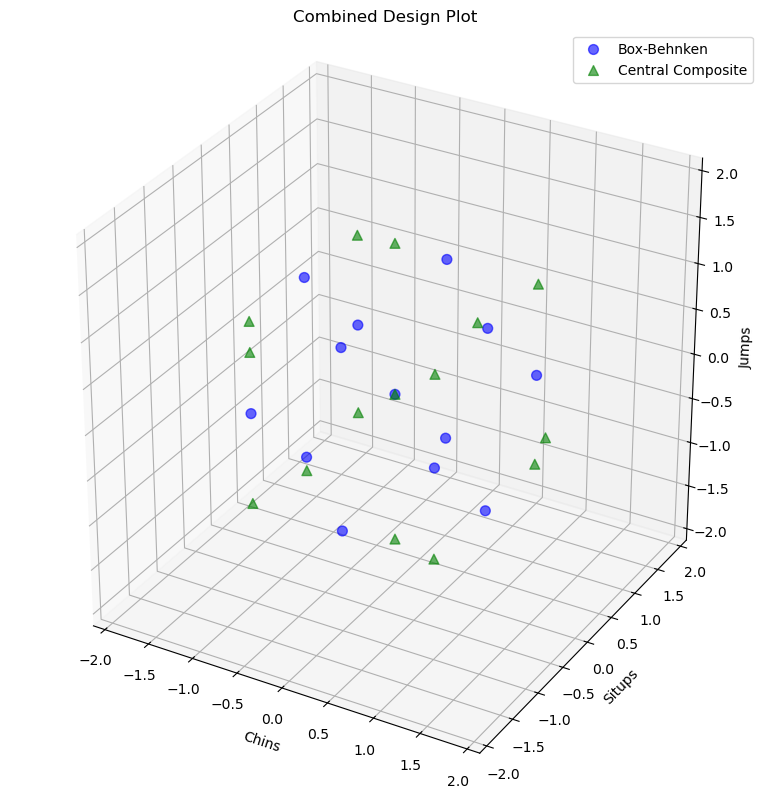

In [7]:
# Combine both designs to find global min and max for each axis
combined_design = np.vstack((bb_design, cc_design))

# Calculate min and max for each factor
x_min, x_max = combined_design[:, 0].min(), combined_design[:, 0].max()
y_min, y_max = combined_design[:, 1].min(), combined_design[:, 1].max()
z_min, z_max = combined_design[:, 2].min(), combined_design[:, 2].max()

# Optionally, add some padding for better visualization
padding = 0.5
x_lim = (x_min - padding, x_max + padding)
y_lim = (y_min - padding, y_max + padding)
z_lim = (z_min - padding, z_max + padding)

axis_limits = {'x': x_lim, 'y': y_lim, 'z': z_lim}

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot Box-Behnken Design
ax.scatter(bb_design[:, 0], bb_design[:, 1], bb_design[:, 2], c='b', marker='o', s=50, alpha=0.6, label='Box-Behnken')

# Plot Central Composite Design
ax.scatter(cc_design[:, 0], cc_design[:, 1], cc_design[:, 2], c='green', marker='^', s=50, alpha=0.6, label='Central Composite')

ax.set_title('Combined Design Plot')
ax.set_xlabel('Chins')
ax.set_ylabel('Situps')
ax.set_zlabel('Jumps')

# Set consistent axis limits
ax.set_xlim(axis_limits['x'])
ax.set_ylim(axis_limits['y'])
ax.set_zlim(axis_limits['z'])

ax.set_box_aspect([1,1,1])  # Requires Matplotlib >= 3.3.0
ax.legend()
plt.tight_layout()
plt.savefig('Combined_Design_Plot_1.png', dpi=300, bbox_inches='tight')
plt.show()

In [8]:
# Set a random seed for reproducibility
np.random.seed(69)

# Fit quadratic models on real Weight values
poly = PolynomialFeatures(degree=2)
bb_design_poly = poly.fit_transform(bb_design)
cc_design_poly = poly.fit_transform(cc_design)

# Simulate responses by randomly sampling Weight from the data
bb_response = np.random.choice(data['Weight'], size=bb_design.shape[0], replace=True)
cc_response = np.random.choice(data['Weight'], size=cc_design.shape[0], replace=True)

# Fit regression models
model_bb = Ridge(alpha=1.0).fit(bb_design_poly, bb_response)
model_cc = Ridge(alpha=1.0).fit(cc_design_poly, cc_response)

# Predictions and accuracy metrics
bb_pred_train = model_bb.predict(bb_design_poly)
cc_pred_train = model_cc.predict(cc_design_poly)

bb_mse = mean_squared_error(bb_response, bb_pred_train)
cc_mse = mean_squared_error(cc_response, cc_pred_train)

bb_r2 = r2_score(bb_response, bb_pred_train)
cc_r2 = r2_score(cc_response, cc_pred_train)

# Output results
print("Box-Behnken Design shape:", bb_design.shape)
print("Central Composite Design shape:", cc_design.shape)
print(f'Box-Behnken Design: MSE = {bb_mse:.4f}, R² = {bb_r2:.4f}')
print(f'Central Composite Design: MSE = {cc_mse:.4f}, R² = {cc_r2:.4f}')

Box-Behnken Design shape: (13, 3)
Central Composite Design shape: (15, 3)
Box-Behnken Design: MSE = 60.8838, R² = 0.7842
Central Composite Design: MSE = 143.8107, R² = 0.5255


### Plot predictions

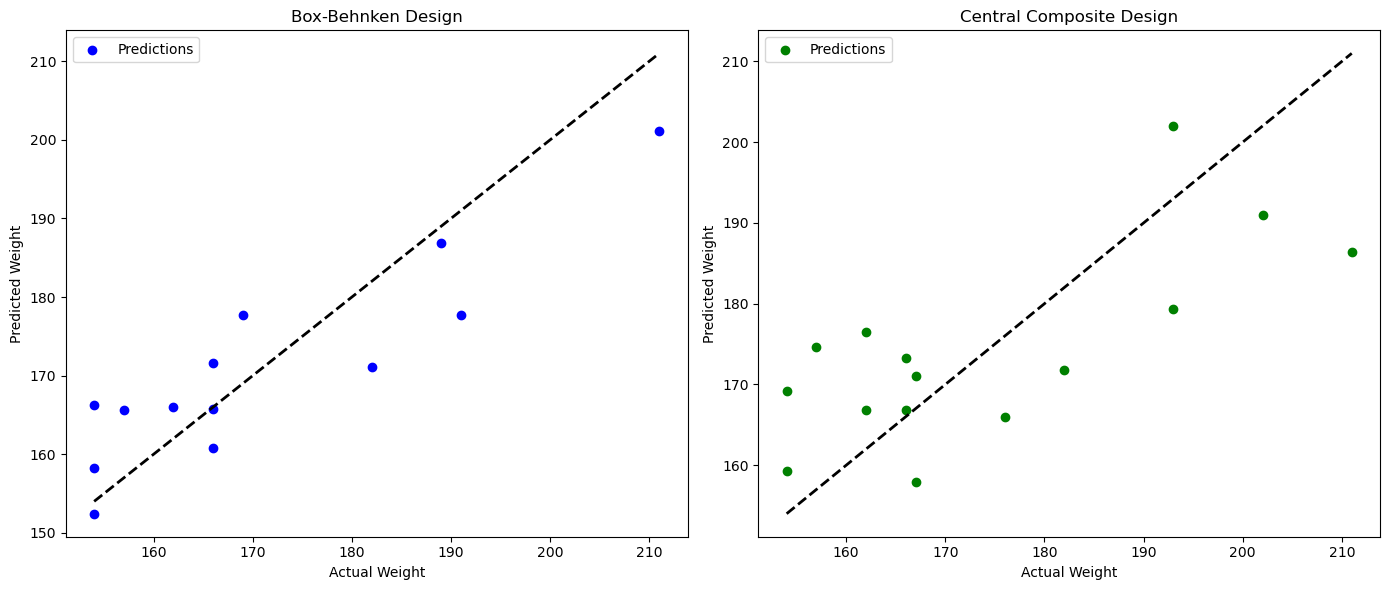

In [9]:
plt.figure(figsize=(14, 6))

# Plot for Box-Behnken predictions
plt.subplot(1, 2, 1)
plt.scatter(bb_response, bb_pred_train, color='blue', label='Predictions')
plt.plot([bb_response.min(), bb_response.max()], [bb_response.min(), bb_response.max()], 'k--', lw=2)
plt.xlabel('Actual Weight')
plt.ylabel('Predicted Weight')
plt.title('Box-Behnken Design')
plt.legend()

# Plot for Central Composite predictions
plt.subplot(1, 2, 2)
plt.scatter(cc_response, cc_pred_train, color='green', label='Predictions')
plt.plot([cc_response.min(), cc_response.max()], [cc_response.min(), cc_response.max()], 'k--', lw=2)
plt.xlabel('Actual Weight')
plt.ylabel('Predicted Weight')
plt.title('Central Composite Design')
plt.legend()

plt.tight_layout()
plt.savefig('Lin_pred_1.png', dpi=300, bbox_inches='tight')
plt.show()


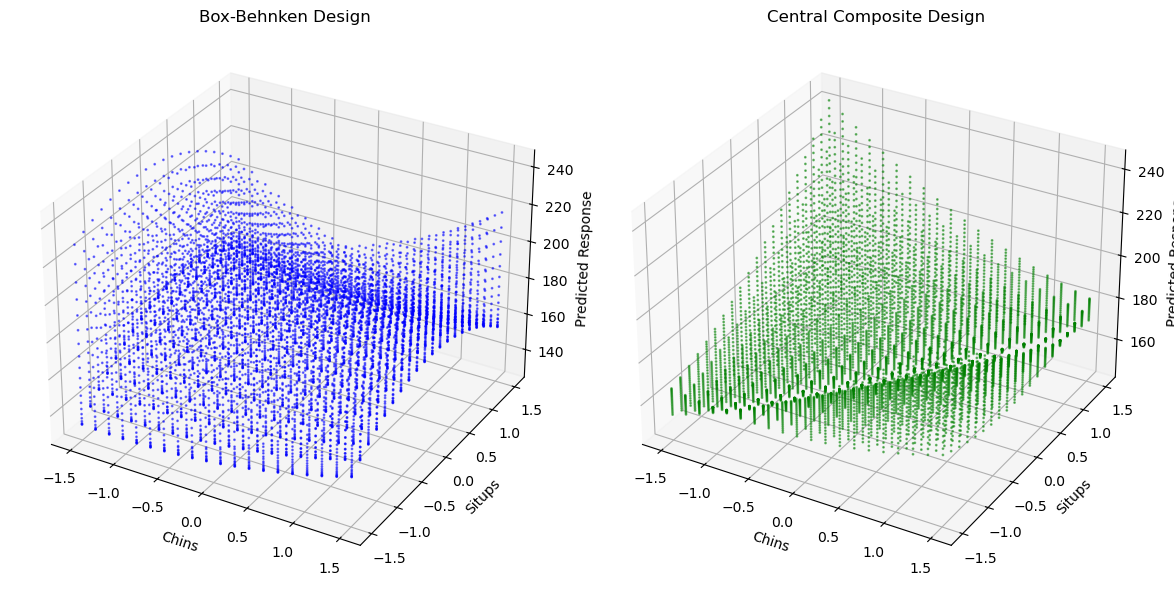

In [10]:
# Set up the polynomial transformation (degree=2 for stability)
poly = PolynomialFeatures(degree=2)
bb_design_poly = poly.fit_transform(bb_design)
cc_design_poly = poly.transform(cc_design)

# Fit models with Linear Regression for BBD and Ridge Regression for CCD
model_bb = Ridge(alpha=1.0).fit(bb_design_poly, bb_response)
model_cc = Ridge(alpha=1.0).fit(cc_design_poly, cc_response)

# Set up a grid for predictions within the CCD range
grid_size = 20
factor_vals = np.linspace(-1.5, 1.5, grid_size)  # Adjust to match CCD range
factor1_grid, factor2_grid, factor3_grid = np.meshgrid(factor_vals, factor_vals, factor_vals)
grid_points = np.c_[factor1_grid.ravel(), factor2_grid.ravel(), factor3_grid.ravel()]
grid_points_poly = poly.transform(grid_points)

# Predictions
bb_pred = model_bb.predict(grid_points_poly).reshape((grid_size, grid_size, grid_size))
cc_pred = model_cc.predict(grid_points_poly).reshape((grid_size, grid_size, grid_size))

# Plotting
fig = plt.figure(figsize=(12, 6))

# Box-Behnken Design plot
ax1 = fig.add_subplot(121, projection='3d')
ax1.scatter(grid_points[:, 0], grid_points[:, 1], bb_pred.ravel(), c='blue', s=1, alpha=0.5)
ax1.set_title("Box-Behnken Design")
ax1.set_xlabel("Chins")
ax1.set_ylabel("Situps")
ax1.set_zlabel("Predicted Response")

# Central Composite Design plot
ax2 = fig.add_subplot(122, projection='3d')
ax2.scatter(grid_points[:, 0], grid_points[:, 1], cc_pred.ravel(), c='green', s=1, alpha=0.5)
ax2.set_title("Central Composite Design")
ax2.set_xlabel("Chins")
ax2.set_ylabel("Situps")
ax2.set_zlabel("Predicted Response")

plt.subplots_adjust(wspace=0.0001)
plt.tight_layout()
plt.savefig('Poly_Pred_1.png', dpi=300, bbox_inches='tight')
plt.show()


## 14 Experiments

In [11]:
# Generate Box-Behnken and Central Composite designs with matching number of experiments
bb_design = bbdesign(3, center=2)  
cc_design = ccdesign(3, center=(0, 0)) 

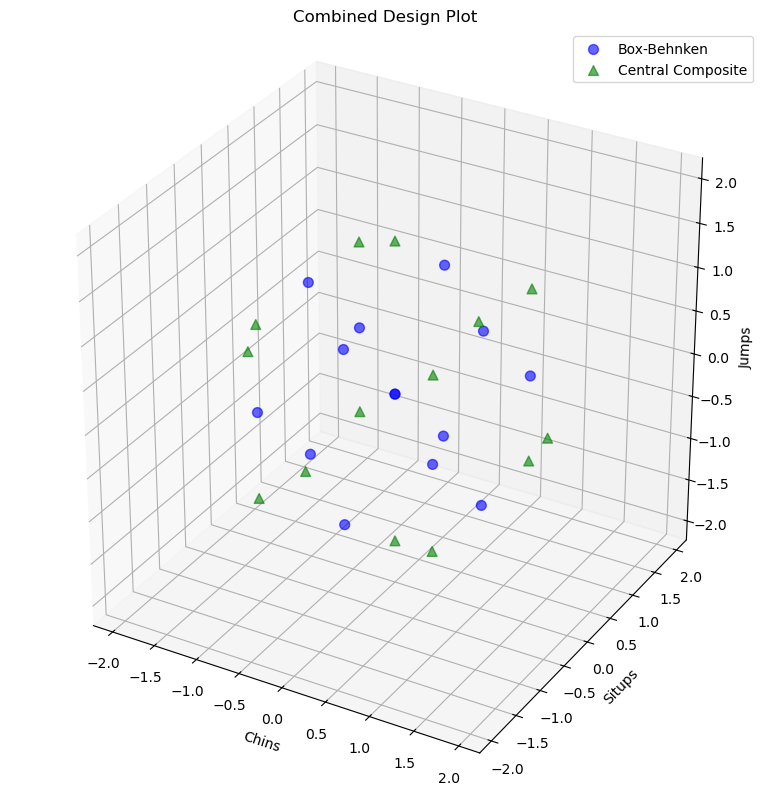

In [12]:
# Combine both designs to find global min and max for each axis
combined_design = np.vstack((bb_design, cc_design))

# Calculate min and max for each factor
x_min, x_max = combined_design[:, 0].min(), combined_design[:, 0].max()
y_min, y_max = combined_design[:, 1].min(), combined_design[:, 1].max()
z_min, z_max = combined_design[:, 2].min(), combined_design[:, 2].max()

# Optionally, add some padding for better visualization
padding = 0.5
x_lim = (x_min - padding, x_max + padding)
y_lim = (y_min - padding, y_max + padding)
z_lim = (z_min - padding, z_max + padding)

axis_limits = {'x': x_lim, 'y': y_lim, 'z': z_lim}

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot Box-Behnken Design
ax.scatter(bb_design[:, 0], bb_design[:, 1], bb_design[:, 2], c='b', marker='o', s=50, alpha=0.6, label='Box-Behnken')

# Plot Central Composite Design
ax.scatter(cc_design[:, 0], cc_design[:, 1], cc_design[:, 2], c='green', marker='^', s=50, alpha=0.6, label='Central Composite')

ax.set_title('Combined Design Plot')
ax.set_xlabel('Chins')
ax.set_ylabel('Situps')
ax.set_zlabel('Jumps')

# Set consistent axis limits
ax.set_xlim(axis_limits['x'])
ax.set_ylim(axis_limits['y'])
ax.set_zlim(axis_limits['z'])

ax.set_box_aspect([1,1,1])  # Requires Matplotlib >= 3.3.0
ax.legend()
plt.tight_layout()
plt.savefig('Combined_Design_Plot_14.png', dpi=300, bbox_inches='tight')
plt.show()

In [13]:
# Set a random seed for reproducibility
np.random.seed(69)

# Fit quadratic models on real Weight values
poly = PolynomialFeatures(degree=2)
bb_design_poly = poly.fit_transform(bb_design)
cc_design_poly = poly.fit_transform(cc_design)

# Simulate responses by randomly sampling Weight from the data
bb_response = np.random.choice(data['Weight'], size=bb_design.shape[0], replace=True)
cc_response = np.random.choice(data['Weight'], size=cc_design.shape[0], replace=True)

# Fit regression models
model_bb = Ridge(alpha=1.0).fit(bb_design_poly, bb_response)
model_cc = Ridge(alpha=1.0).fit(cc_design_poly, cc_response)

# Predictions and accuracy metrics
bb_pred_train = model_bb.predict(bb_design_poly)
cc_pred_train = model_cc.predict(cc_design_poly)

bb_mse = mean_squared_error(bb_response, bb_pred_train)
cc_mse = mean_squared_error(cc_response, cc_pred_train)

bb_r2 = r2_score(bb_response, bb_pred_train)
cc_r2 = r2_score(cc_response, cc_pred_train)

# Output results
print("Box-Behnken Design shape:", bb_design.shape)
print("Central Composite Design shape:", cc_design.shape)
print(f'Box-Behnken Design: MSE = {bb_mse:.4f}, R² = {bb_r2:.4f}')
print(f'Central Composite Design: MSE = {cc_mse:.4f}, R² = {cc_r2:.4f}')

Box-Behnken Design shape: (14, 3)
Central Composite Design shape: (14, 3)
Box-Behnken Design: MSE = 62.3938, R² = 0.7634
Central Composite Design: MSE = 238.0998, R² = 0.2661


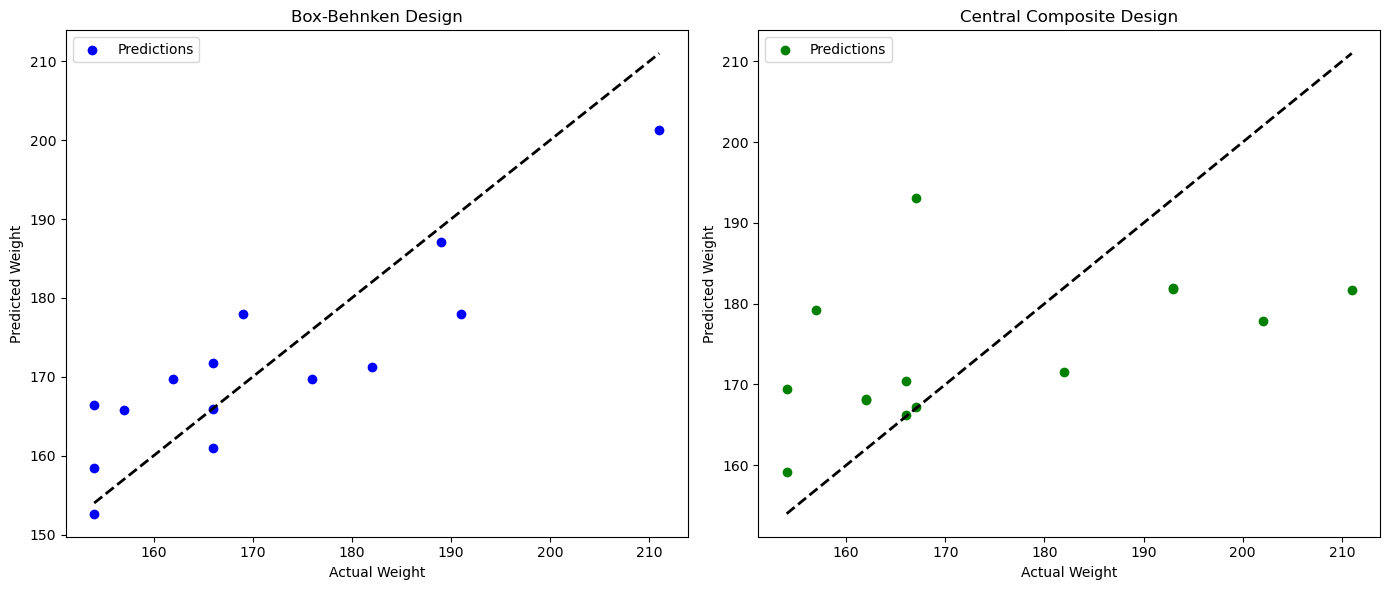

In [14]:
plt.figure(figsize=(14, 6))

# Plot for Box-Behnken predictions
plt.subplot(1, 2, 1)
plt.scatter(bb_response, bb_pred_train, color='blue', label='Predictions')
plt.plot([bb_response.min(), bb_response.max()], [bb_response.min(), bb_response.max()], 'k--', lw=2)
plt.xlabel('Actual Weight')
plt.ylabel('Predicted Weight')
plt.title('Box-Behnken Design')
plt.legend()

# Plot for Central Composite predictions
plt.subplot(1, 2, 2)
plt.scatter(cc_response, cc_pred_train, color='green', label='Predictions')
plt.plot([cc_response.min(), cc_response.max()], [cc_response.min(), cc_response.max()], 'k--', lw=2)
plt.xlabel('Actual Weight')
plt.ylabel('Predicted Weight')
plt.title('Central Composite Design')
plt.legend()

plt.tight_layout()
plt.savefig('Lin_pred_14.png', dpi=300, bbox_inches='tight')
plt.show()


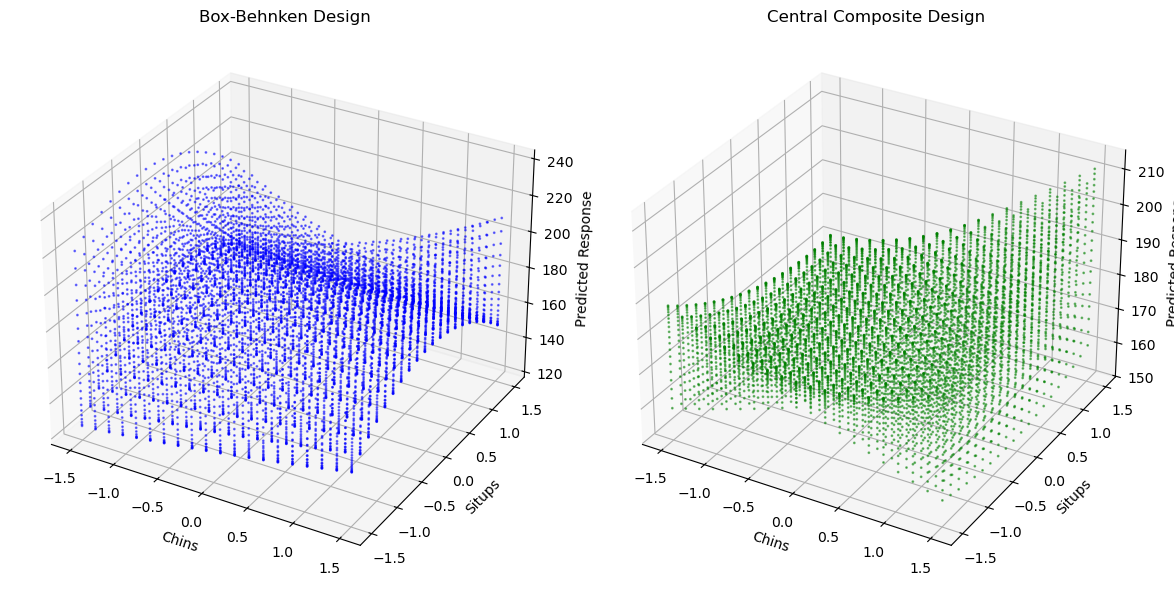

In [15]:
# Set up the polynomial transformation (degree=2 for stability)
poly = PolynomialFeatures(degree=2)
bb_design_poly = poly.fit_transform(bb_design)
cc_design_poly = poly.transform(cc_design)

# Fit models with Linear Regression for BBD and Ridge Regression for CCD
model_bb = Ridge(alpha=1.0).fit(bb_design_poly, bb_response)
model_cc = Ridge(alpha=1.0).fit(cc_design_poly, cc_response)

# Set up a grid for predictions within the CCD range
grid_size = 20
factor_vals = np.linspace(-1.5, 1.5, grid_size)  # Adjust to match CCD range
factor1_grid, factor2_grid, factor3_grid = np.meshgrid(factor_vals, factor_vals, factor_vals)
grid_points = np.c_[factor1_grid.ravel(), factor2_grid.ravel(), factor3_grid.ravel()]
grid_points_poly = poly.transform(grid_points)

# Predictions
bb_pred = model_bb.predict(grid_points_poly).reshape((grid_size, grid_size, grid_size))
cc_pred = model_cc.predict(grid_points_poly).reshape((grid_size, grid_size, grid_size))

# Plotting
fig = plt.figure(figsize=(12, 6))

# Box-Behnken Design plot
ax1 = fig.add_subplot(121, projection='3d')
ax1.scatter(grid_points[:, 0], grid_points[:, 1], bb_pred.ravel(), c='blue', s=1, alpha=0.5)
ax1.set_title("Box-Behnken Design")
ax1.set_xlabel("Chins")
ax1.set_ylabel("Situps")
ax1.set_zlabel("Predicted Response")

# Central Composite Design plot
ax2 = fig.add_subplot(122, projection='3d')
ax2.scatter(grid_points[:, 0], grid_points[:, 1], cc_pred.ravel(), c='green', s=1, alpha=0.5)
ax2.set_title("Central Composite Design")
ax2.set_xlabel("Chins")
ax2.set_ylabel("Situps")
ax2.set_zlabel("Predicted Response")

plt.subplots_adjust(wspace=0.0001)
plt.tight_layout()
plt.savefig('Poly_Pred_14.png', dpi=300, bbox_inches='tight')
plt.show()


## Two Center Points

In [42]:
# Generate Box-Behnken and Central Composite designs with matching number of experiments
bb_design = bbdesign(3, center=2)  
cc_design = ccdesign(3, center=(2,0)) 

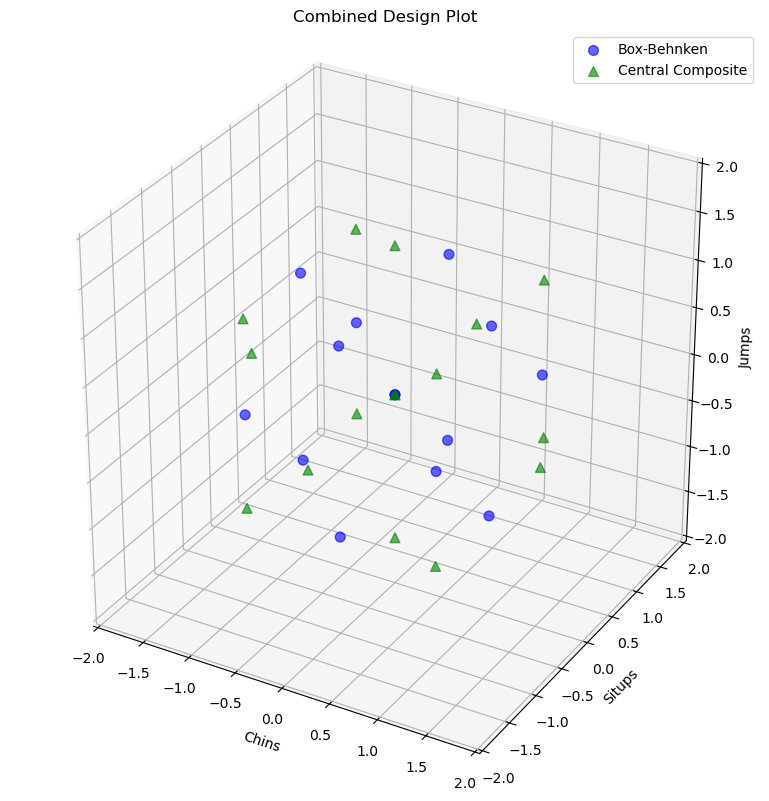

In [43]:
# Combine both designs to find global min and max for each axis
combined_design = np.vstack((bb_design, cc_design))

# Calculate min and max for each factor
x_min, x_max = combined_design[:, 0].min(), combined_design[:, 0].max()
y_min, y_max = combined_design[:, 1].min(), combined_design[:, 1].max()
z_min, z_max = combined_design[:, 2].min(), combined_design[:, 2].max()

# Optionally, add some padding for better visualization
padding = 0.5
x_lim = (x_min - padding, x_max + padding)
y_lim = (y_min - padding, y_max + padding)
z_lim = (z_min - padding, z_max + padding)

axis_limits = {'x': x_lim, 'y': y_lim, 'z': z_lim}

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot Box-Behnken Design
ax.scatter(bb_design[:, 0], bb_design[:, 1], bb_design[:, 2], c='b', marker='o', s=50, alpha=0.6, label='Box-Behnken')

# Plot Central Composite Design
ax.scatter(cc_design[:, 0], cc_design[:, 1], cc_design[:, 2], c='green', marker='^', s=50, alpha=0.6, label='Central Composite')

ax.set_title('Combined Design Plot')
ax.set_xlabel('Chins')
ax.set_ylabel('Situps')
ax.set_zlabel('Jumps')

# Set consistent axis limits
ax.set_xlim(axis_limits['x'])
ax.set_ylim(axis_limits['y'])
ax.set_zlim(axis_limits['z'])

ax.set_box_aspect([1,1,1])  # Requires Matplotlib >= 3.3.0
ax.legend()
plt.tight_layout()
plt.savefig('Combined_Design_Plot_2.png', dpi=300, bbox_inches='tight')
plt.show()

In [44]:
# Set a random seed for reproducibility
np.random.seed(69)

# Fit quadratic models on real Weight values
poly = PolynomialFeatures(degree=2)
bb_design_poly = poly.fit_transform(bb_design)
cc_design_poly = poly.fit_transform(cc_design)

# Simulate responses by randomly sampling Weight from the data
bb_response = np.random.choice(data['Weight'], size=bb_design.shape[0], replace=True)
cc_response = np.random.choice(data['Weight'], size=cc_design.shape[0], replace=True)

# Fit regression models
model_bb = Ridge(alpha=1.0).fit(bb_design_poly, bb_response)
model_cc = Ridge(alpha=1.0).fit(cc_design_poly, cc_response)

# Predictions and accuracy metrics
bb_pred_train = model_bb.predict(bb_design_poly)
cc_pred_train = model_cc.predict(cc_design_poly)

bb_mse = mean_squared_error(bb_response, bb_pred_train)
cc_mse = mean_squared_error(cc_response, cc_pred_train)

bb_r2 = r2_score(bb_response, bb_pred_train)
cc_r2 = r2_score(cc_response, cc_pred_train)

# Output results
print("Box-Behnken Design shape:", bb_design.shape)
print("Central Composite Design shape:", cc_design.shape)
print(f'Box-Behnken Design: MSE = {bb_mse:.4f}, R² = {bb_r2:.4f}')
print(f'Central Composite Design: MSE = {cc_mse:.4f}, R² = {cc_r2:.4f}')

Box-Behnken Design shape: (14, 3)
Central Composite Design shape: (16, 3)
Box-Behnken Design: MSE = 62.3938, R² = 0.7634
Central Composite Design: MSE = 137.8365, R² = 0.6026


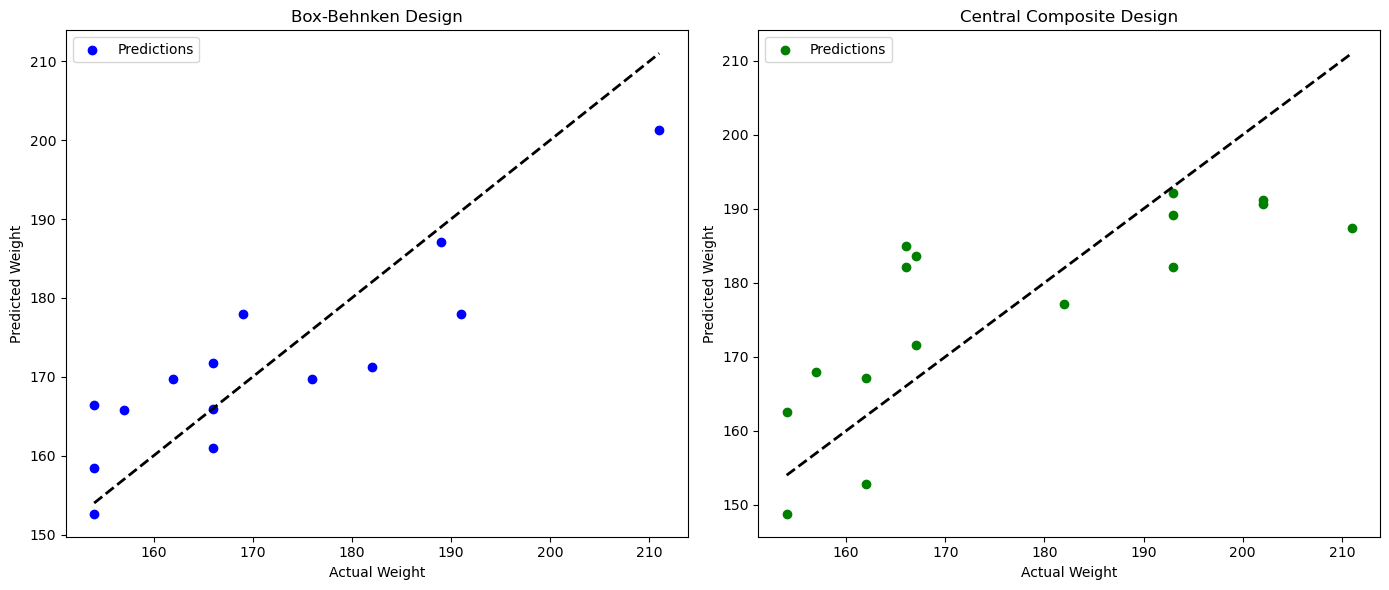

In [22]:
plt.figure(figsize=(14, 6))

# Plot for Box-Behnken predictions
plt.subplot(1, 2, 1)
plt.scatter(bb_response, bb_pred_train, color='blue', label='Predictions')
plt.plot([bb_response.min(), bb_response.max()], [bb_response.min(), bb_response.max()], 'k--', lw=2)
plt.xlabel('Actual Weight')
plt.ylabel('Predicted Weight')
plt.title('Box-Behnken Design')
plt.legend()

# Plot for Central Composite predictions
plt.subplot(1, 2, 2)
plt.scatter(cc_response, cc_pred_train, color='green', label='Predictions')
plt.plot([cc_response.min(), cc_response.max()], [cc_response.min(), cc_response.max()], 'k--', lw=2)
plt.xlabel('Actual Weight')
plt.ylabel('Predicted Weight')
plt.title('Central Composite Design')
plt.legend()

plt.tight_layout()
plt.savefig('Lin_pred_2.png', dpi=300, bbox_inches='tight')
plt.show()


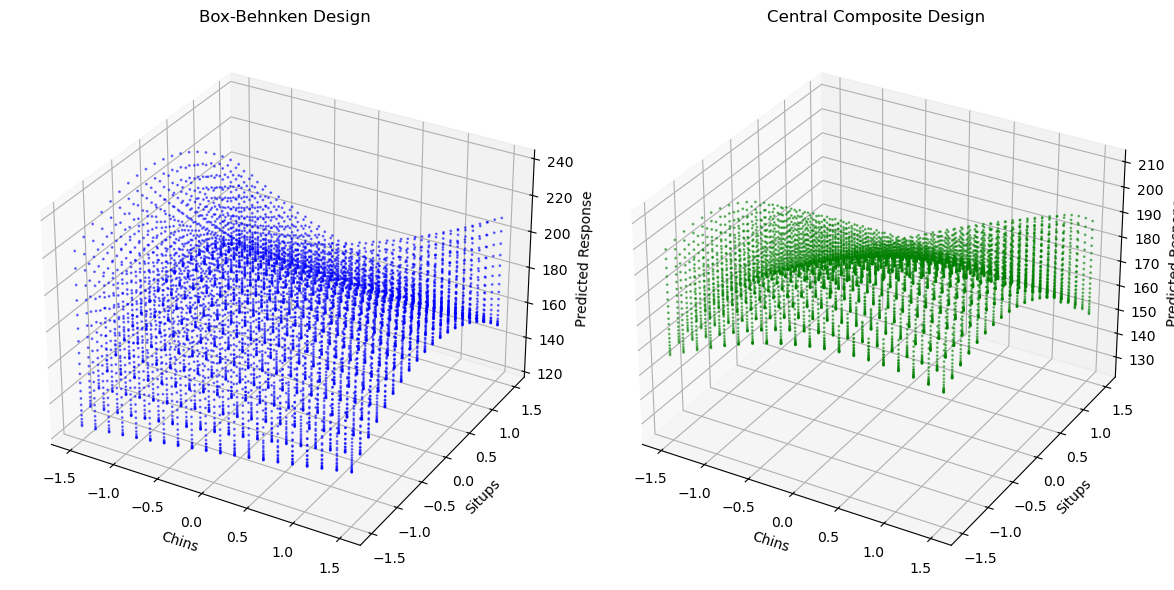

In [23]:
# Set up the polynomial transformation (degree=2 for stability)
poly = PolynomialFeatures(degree=2)
bb_design_poly = poly.fit_transform(bb_design)
cc_design_poly = poly.transform(cc_design)

# Fit models with Linear Regression for BBD and Ridge Regression for CCD
model_bb = Ridge(alpha=1.0).fit(bb_design_poly, bb_response)
model_cc = Ridge(alpha=1.0).fit(cc_design_poly, cc_response)

# Set up a grid for predictions within the CCD range
grid_size = 20
factor_vals = np.linspace(-1.5, 1.5, grid_size)  # Adjust to match CCD range
factor1_grid, factor2_grid, factor3_grid = np.meshgrid(factor_vals, factor_vals, factor_vals)
grid_points = np.c_[factor1_grid.ravel(), factor2_grid.ravel(), factor3_grid.ravel()]
grid_points_poly = poly.transform(grid_points)

# Predictions
bb_pred = model_bb.predict(grid_points_poly).reshape((grid_size, grid_size, grid_size))
cc_pred = model_cc.predict(grid_points_poly).reshape((grid_size, grid_size, grid_size))

# Plotting
fig = plt.figure(figsize=(12, 6))

# Box-Behnken Design plot
ax1 = fig.add_subplot(121, projection='3d')
ax1.scatter(grid_points[:, 0], grid_points[:, 1], bb_pred.ravel(), c='blue', s=1, alpha=0.5)
ax1.set_title("Box-Behnken Design")
ax1.set_xlabel("Chins")
ax1.set_ylabel("Situps")
ax1.set_zlabel("Predicted Response")

# Central Composite Design plot
ax2 = fig.add_subplot(122, projection='3d')
ax2.scatter(grid_points[:, 0], grid_points[:, 1], cc_pred.ravel(), c='green', s=1, alpha=0.5)
ax2.set_title("Central Composite Design")
ax2.set_xlabel("Chins")
ax2.set_ylabel("Situps")
ax2.set_zlabel("Predicted Response")

plt.subplots_adjust(wspace=0.0001)
plt.tight_layout()
plt.savefig('Poly_Pred_2.png', dpi=300, bbox_inches='tight')
plt.show()
